# Insights and Data Analysis report of PublicSurvey 2k18

## Instructions-
1. In order to view plots made by plotly you must have an account on plotly's official website.
- After making the account you need to go the settings.
- Then you need to copy Api key from the api key tab to the below specified column after importing plotly.
- Then you need to write your user name that you have chosen for the plotly account.
- You must have an active internet connection for the whole procedure.

### Libraries Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='shantanu0304',api_key='jkPtfFBPmH9zlXidOH5O') #paste your api key here 
from bokeh.io import show, output_file,curdoc
from bokeh.plotting import figure
from bokeh.models.widgets import Panel,Tabs
from IPython.display import Image

In [2]:
publicData = pd.read_csv("Public Opinion Poll.csv")

In [3]:
publicData.head()

,Timestamp,Which age group do you belong to?,What is your profession?,Who is your favourate political leader in India?,Do you think Narendra Modi has the ability to transform India?,How much time do you give to your mobile phone in one day?,What would you like to do in your free time?,What would you do to enhance your knowledge?,Which type of music do you love to listen?,Which type of marriage is best?,Which social networking plateform do you love to use the most?,Which online shopping site do you like to prefer?,How much time you give to your parents in a day?,What would you like to do to remain fit and healthy?,Which shampoo brand would you like to use?,Which toothpaste brand would you like to use?
0,2018/12/09 6:48:29 pm GMT+5:30,11-20 year,Student,Narendra Modi,Yes,1-3 hours,Read Books,Read Newspapers,Romantic,Love Marriage,Watsapp,Flipkart,less than 1 hour,Normal Excercises,Pantene,Colgate
1,2018/12/09 6:55:34 pm GMT+5:30,31-40 year,Housewife,Narendra Modi,Yes,5-7 hours,Read something new,Read Newspapers,Rock,Arrange Marriage,Watsapp,Amazon,2-3 hours,Normal Excercises,Pantene,Close-Up
2,2018/12/09 6:57:50 pm GMT+5:30,41-50 year,Housewife,None,Yes,3-5 hours,Hangout with friends,Mobile,Classic,Arrange Marriage,Facebook,Paytm Mall,2-3 hours,Normal Excercises,Sunsilk,Dant Kanti
3,2018/12/09 7:05:21 pm GMT+5:30,31-40 year,Housewife,Narendra Modi,Yes,greater than 7 hours,Shopping n meetings with friends,Cooking,Romantic,Love Marriage,Watsapp,Paytm Mall,3-4 hours,Dieting,LOreal,Dant Kanti
4,2018/12/09 7:16:18 pm GMT+5:30,41-50 year,Housewife,none,Yes,3-5 hours,Online bussiness,Mobile,Romantic,Love Marriage,Facebook,Paytm Mall,1-2 hours,Normal Excercises,Dove,Sensodyne


In [4]:
publicData['Timestamp']=pd.to_datetime(publicData['Timestamp'])

In [5]:
publicData.set_index('Timestamp',inplace=True)

## Data Prepration
### 1. Handeling Missing values -
    - There are two ways to handel missing values, either remove them or fill them with mean/median/mode of data
    - The wisest solution is to fill them. Removing missing data can cause significient data loss, and  can also introduce potential biases
### 2. Dealing with datatypes -
    - There are three main data types:
        - Numeric, e.g. income, age
        - Categorical, e.g. gender, nationality 
        - Ordinal, e.g. low/medium/high
        
    - Models can only handle numeric features
    
    - Must convert categorical and ordinal features into numeric features
        - Create dummy features
        - Transform a categorical feature into a set of dummy features, each representing a unique category
        - In the set of dummy features, 1 indicates that the observation belongs to that category

In [6]:
publicData.isna().sum()

Which age group do you belong to?                                 0
What is your profession?                                          0
Who is your favourate political leader in India?                  0
Do you think Narendra Modi has the ability to transform India?    0
How much time do you give to your mobile phone in one day?        0
What would you like to do in your free time?                      0
What would you do to enhance your knowledge?                      0
Which type of music do you love to listen?                        5
Which type of marriage is best?                                   0
Which social networking plateform do you love to use the most?    0
Which online shopping site do you like to prefer?                 0
How much time you give to your parents in a day?                  0
What would you like to do to remain fit and healthy?              0
Which shampoo brand would you like to use?                        0
Which toothpaste brand would you like to use?   

In [7]:
publicData['Which type of music do you love to listen?']=publicData['Which type of music do you love to listen?'].fillna(
    publicData['Which type of music do you love to listen?'].mode().iloc[0])

In [8]:
publicData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2018-12-10 00:18:29 to 2018-12-23 02:35:15
Data columns (total 15 columns):
Which age group do you belong to?                                 148 non-null object
What is your profession?                                          148 non-null object
Who is your favourate political leader in India?                  148 non-null object
Do you think Narendra Modi has the ability to transform India?    148 non-null object
How much time do you give to your mobile phone in one day?        148 non-null object
What would you like to do in your free time?                      148 non-null object
What would you do to enhance your knowledge?                      148 non-null object
Which type of music do you love to listen?                        148 non-null object
Which type of marriage is best?                                   148 non-null object
Which social networking plateform do you love to use the most?    148 non-null objec

In [9]:
publicData['What is your profession?'].value_counts()

Student          100
Business          20
Housewife         15
Service           12
give teutions      1
Name: What is your profession?, dtype: int64

In [10]:
series1 = publicData['What is your profession?'].value_counts().keys()


In [11]:
for i in series1:
    if i == 'give teutions':
        publicData['What is your profession?'].replace(to_replace = i , value = 'Business', inplace = True)

In [12]:
publicData['Who is your favourate political leader in India?'].value_counts()

Narendra Modi                                            121
Sushma Swaraj                                              7
Arvind Kejriwal                                            4
None                                                       3
Rahul Gandhi                                               2
Arun Jaitley                                               2
Akhilesh yadav                                             1
Student                                                    1
Noone                                                      1
I like freedom fighters rather than political leaders      1
none                                                       1
Aklesh yadav                                               1
No one now                                                 1
Bhumika😂                                                   1
No one                                                     1
Name: Who is your favourate political leader in India?, dtype: int64

In [13]:
series2 = publicData['Who is your favourate political leader in India?'].value_counts().keys()

In [14]:
for i in series2:
    if 'No' in i or 'none' in i or 'None' in i:
        publicData['Who is your favourate political leader in India?'].replace(to_replace = i , value = 'None' , inplace = True)
    elif 'leader' in i or 'leaders' in i or 'Student' in i or 'Bhumika' in i:
        publicData['Who is your favourate political leader in India?'].replace(to_replace = i , value = 'None' , inplace = True)
    elif 'Akhilesh' in i or 'Aklesh' in i:
        publicData['Who is your favourate political leader in India?'].replace(to_replace = i , value = 'Akhilesh Yadav' , inplace = True)
        

In [15]:
publicData['Who is your favourate political leader in India?'].value_counts()

Narendra Modi      121
None                10
Sushma Swaraj        7
Arvind Kejriwal      4
Rahul Gandhi         2
Arun Jaitley         2
Akhilesh Yadav       2
Name: Who is your favourate political leader in India?, dtype: int64

In [16]:
publicData['How much time do you give to your mobile phone in one day?'].value_counts()

1-3 hours               58
3-5 hours               41
5-7 hours               19
greater than 7 hours    16
less than 1hour         14
Name: How much time do you give to your mobile phone in one day?, dtype: int64

In [17]:
publicData['What would you like to do in your free time?'].value_counts()

Hangout with friends                 52
Watch Movies                         27
Read something new                   16
Read Books                           11
Read News                             8
Play Computer Games                   7
Play Outdoor Games                    7
Mobile games or social media          1
Dance                                 1
Play outdoor sports                   1
It's none of your business            1
listning songs                        1
Using mobile phone                    1
Watching Web Series                   1
Rotary club activties                 1
Watch Youtube                         1
Talk to my fiance or take a nap       1
Shopping n meetings with friends      1
Online bussiness                      1
Watch football videos                 1
  Spend time with family              1
Spend time with my family             1
Scooty se Ghumnaa                     1
Plan to increase sale !!              1
Sleeping                              1


In [18]:
series3 = publicData['What would you like to do in your free time?'].value_counts().keys()

In [19]:
for i in series3:
    if i == 'Pubg':
        publicData['What would you like to do in your free time?'].replace(to_replace = i , value = 'Play Computer Games' , inplace = True)
    elif 'Watch' in i or 'Watching' in i:
        publicData['What would you like to do in your free time?'].replace(to_replace = i , value = 'Watch Movies/Series/Videos' , inplace = True)
    elif 'Hangout with friends' in i or 'Read something new' in i or 'Read Books' in i or 'Read News' in i or 'Play Computer Games' in i or 'Play Outdoor Games' in i:
        pass
    else:
        publicData['What would you like to do in your free time?'].replace(to_replace = i , value = 'Others' , inplace = True)
    

In [20]:
publicData['What would you do to enhance your knowledge?'].value_counts()

Watch documentaries / Educational videos                                        49
Read Newspapers                                                                 34
Read Books                                                                      25
Do Courses                                                                      18
Read Articles                                                                   11
Cooking                                                                          2
Mobile                                                                           2
I am active on social media so I get latest updates and knowledge from there     2
Iq games                                                                         1
Social Networking Sites                                                          1
Sleeping                                                                         1
Through insta news account                                                       1
comm

In [21]:
series4 = publicData['What would you do to enhance your knowledge?'].value_counts().keys()

In [22]:
series4

Index(['Watch documentaries / Educational videos', 'Read Newspapers',
       'Read Books', 'Do Courses', 'Read Articles', 'Cooking', 'Mobile',
       'I am active on social media so I get latest updates and knowledge from there',
       'Iq games', 'Social Networking Sites', 'Sleeping ',
       'Through insta news account',
       'communicate with others as communicating is the best way to get knowledge'],
      dtype='object')

In [23]:
for i in series4:
    if 'communicate' in i or 'Social' in i or 'social' in i:
        publicData['What would you do to enhance your knowledge?'].replace(to_replace=i,value='Social Networking Sites',inplace = True)
    elif 'Watch documentaries / Educational videos' in i or 'Read Newspapers' in i or 'Read Books' in i or 'Do Courses' in i or 'Read Articles' in i:
        pass
    else:
        publicData['What would you do to enhance your knowledge?'].replace(to_replace=i,value='Others',inplace = True)        

In [24]:
publicData['Which type of music do you love to listen?'].value_counts()

Romantic                                                               91
Classic                                                                23
Rock                                                                   16
Rap                                                                     4
Punjabi                                                                 2
Hiphop                                                                  2
sad songs                                                               1
Jo bhajj rha ho sun lete hai                                            1
I like to listen only my favourite hero movie songs of any category     1
Only my favourite hero 's song                                          1
Depends on mood                                                         1
Folk                                                                    1
Evergreen bollywood songs                                               1
Every type of song which creates some 

In [25]:
series5 = publicData['Which type of music do you love to listen?'].value_counts().keys()

In [26]:
for i in series5:
    if 'Romantic' in i or 'Classic' in i or 'Rock' in i or 'Hiphop' in i:
        pass
    elif 'Punjabi' in i:
        publicData['Which type of music do you love to listen?'].replace(to_replace=i,value='Punjabi',inplace=True)
    else:
        publicData['Which type of music do you love to listen?'].replace(to_replace=i,value='Others',inplace=True)

In [27]:
publicData['Which type of music do you love to listen?'].value_counts()

Romantic    91
Classic     23
Rock        16
Others      13
Punjabi      3
Hiphop       2
Name: Which type of music do you love to listen?, dtype: int64

In [28]:
publicData['Which social networking plateform do you love to use the most?'].value_counts()

Watsapp                                       62
Instagram                                     51
Facebook                                      23
Twitter                                        3
Snapchat                                       2
YouTube                                        1
Google                                         1
LinkedIn                                       1
No I do not use any social networking site     1
I donot use any social networking sites        1
You tube                                       1
Wattpad                                        1
Name: Which social networking plateform do you love to use the most?, dtype: int64

In [29]:
series6 = publicData['Which social networking plateform do you love to use the most?'].value_counts().keys()

In [30]:
for i in series6:
    if 'Watsapp' in i or 'Facebook' in i or 'Twitter' in i or 'Snapchat' in i or 'LinkedIn' in i or 'Instagram' in i:
        pass
    else:
        publicData['Which social networking plateform do you love to use the most?'].replace(to_replace=i,value='Others',inplace=True)

In [31]:
publicData['Which online shopping site do you like to prefer?'].value_counts()

Amazon                  59
Flipkart                42
Paytm Mall              21
Myntra                  15
Snapdeal                 4
Misso                    1
Lazada                   1
Myself site              1
Club factory             1
Depends on discounts     1
Shopclues                1
None                     1
Name: Which online shopping site do you like to prefer?, dtype: int64

In [32]:
series7 = publicData['Which online shopping site do you like to prefer?'].value_counts().keys()

In [33]:
for i in series7:
    if 'Depends' in i or 'Misso' in i or 'None' in i or 'site' in i or 'Lazada' in i:
        publicData['Which online shopping site do you like to prefer?'].replace(to_replace=i,value='Others',inplace=True)
        

In [34]:
publicData['What would you like to do to remain fit and healthy?'].value_counts()

Normal Excercises      77
Jym                    27
Yoga                   15
Dieting                11
Nothing                 4
Nothing                 2
Stay fit                1
Scooty Drivingg         1
Kuch na                 1
Kuch nhi 😉              1
nothing                 1
Always keep smiling     1
Dancing                 1
Household jobs          1
None                    1
Daily Walk              1
Workout                 1
Its gym                 1
Name: What would you like to do to remain fit and healthy?, dtype: int64

In [35]:
series8 = publicData['What would you like to do to remain fit and healthy?'].value_counts().keys()

In [36]:
for i in series8:
    if 'Jym' in i or 'gym' in i:
        publicData['What would you like to do to remain fit and healthy?'].replace(to_replace=i,value='Gym',inplace=True)
    elif 'Normal' in i or 'Daily' in i or 'Dancing' in i or 'Workout' in i:
        publicData['What would you like to do to remain fit and healthy?'].replace(to_replace=i,value='Normal Exercises',inplace=True)
    elif 'Yoga' in i or 'Dieting' in i:
        pass
    else:
        publicData['What would you like to do to remain fit and healthy?'].replace(to_replace=i,value='Nothing',inplace=True)

In [37]:
publicData['Which shampoo brand would you like to use?'].value_counts()

Dove                        29
TRESemme                    22
Head & Shoulders            20
Kesh Kanti                  17
Sunsilk                     12
LOreal                      10
Pantene                      7
Clinic plus                  4
Park avenue beer shampoo     2
Clinic plus                  2
Berdo                        1
Clinic Plus                  1
Nothing                      1
Boitieque                    1
Park Avenue,Beer Shampoo     1
Biotique                     1
Park Avenue                  1
Selsun                       1
Garnier                      1
Matrix                       1
Usee hi nhi krte hai         1
Bear shampoo                 1
Halo                         1
Wella                        1
Patanjali                    1
Beer                         1
Himalaya                     1
Loreal                       1
Scalpe+                      1
Clinic +                     1
Hello                        1
Himalya                      1
Wowshamp

In [38]:
series9 = publicData['Which shampoo brand would you like to use?'].value_counts().keys()

In [39]:
series9

Index(['Dove', 'TRESemme', 'Head & Shoulders', 'Kesh Kanti', 'Sunsilk',
       'LOreal', 'Pantene', 'Clinic plus', 'Park avenue beer shampoo',
       'Clinic plus ', 'Berdo', 'Clinic Plus', 'Nothing', 'Boitieque',
       'Park Avenue,Beer Shampoo', 'Biotique', 'Park Avenue', 'Selsun',
       'Garnier', 'Matrix', 'Usee hi nhi krte hai', 'Bear shampoo', 'Halo',
       'Wella', 'Patanjali', 'Beer', 'Himalaya', 'Loreal', 'Scalpe+',
       'Clinic +', 'Hello', 'Himalya', 'Wowshampoo'],
      dtype='object')

In [40]:
for i in series9:
    if 'Dove' in i or 'TRESemme' in i or 'Head & Shoulders' in i or 'Sunsilk' in i or 'Pantene' in i:
        pass
    elif 'Kesh Kanti' in i or 'Patanjali' in i:
        publicData['Which shampoo brand would you like to use?'].replace(to_replace=i, value='Kesh Kanti',inplace = True)
    elif 'Park' in i or 'Bear' in i :
        publicData['Which shampoo brand would you like to use?'].replace(to_replace=i, value='Beer Shampoo',inplace = True)
    elif 'Clinic' in i:
        publicData['Which shampoo brand would you like to use?'].replace(to_replace=i, value='Clinic plus',inplace = True)
    elif 'Loreal' in i or 'LOreal' in i:
        publicData['Which shampoo brand would you like to use?'].replace(to_replace=i, value='LOreal',inplace = True)
    else:
        publicData['Which shampoo brand would you like to use?'].replace(to_replace=i, value='Others',inplace = True)

In [41]:
publicData['Which shampoo brand would you like to use?'].value_counts()

Dove                29
TRESemme            22
Head & Shoulders    20
Kesh Kanti          18
Others              16
Sunsilk             12
LOreal              11
Clinic plus          8
Pantene              7
Beer Shampoo         5
Name: Which shampoo brand would you like to use?, dtype: int64

In [42]:
publicData['Which toothpaste brand would you like to use?'].value_counts()

Colgate       67
Dant Kanti    48
Close-Up      16
Sensodyne      7
Pepsodent      4
Shy-nm         1
Beer           1
DXN            1
Dabur red      1
Daburred       1
Dabar red      1
Name: Which toothpaste brand would you like to use?, dtype: int64

In [43]:
series10 = publicData['Which toothpaste brand would you like to use?'].value_counts().keys()

In [44]:
series10

Index(['Colgate', 'Dant Kanti', 'Close-Up', 'Sensodyne', 'Pepsodent', 'Shy-nm',
       'Beer', 'DXN', 'Dabur red', 'Daburred', 'Dabar red'],
      dtype='object')

In [45]:
for i in series10:
    if 'Colgate' in i or 'Dant Kanti' in i or 'Close-Up' in i or 'Sensodyne' in i or 'Pepsodent' in i:
        pass
    else:
         publicData['Which toothpaste brand would you like to use?'].replace(to_replace=i,value='Others',inplace=True)

In [46]:
publicData['Which toothpaste brand would you like to use?'].value_counts()

Colgate       67
Dant Kanti    48
Close-Up      16
Sensodyne      7
Others         6
Pepsodent      4
Name: Which toothpaste brand would you like to use?, dtype: int64

# Insight 1
### As we can see that most entries are of students.

## Conclusion - Most active age group is teenage which takes part in public welfare works.

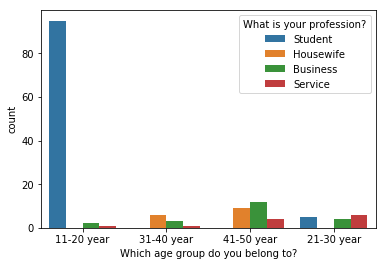

In [47]:
sns.countplot(x='Which age group do you belong to?',data=publicData,hue='What is your profession?')

In [48]:
a=publicData['Who is your favourate political leader in India?'].value_counts()
label1=a.keys()

In [49]:
value1=a.values

# Insight 2

## Narendra Modi is the favourite political leader among all age groups in 2k18

In [50]:
trace = go.Pie(labels=label1, values=value1,title='Favourite Political Leader',marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [51]:
b=publicData['Do you think Narendra Modi has the ability to transform India?'].value_counts()

In [52]:
label2=b.keys()
value2=b.values

# Insight 3

## Narendra modi has the ability to transform India

In [53]:
trace = go.Pie(labels=label2, values=value2,title='Do Narendra Modi has the ability to transform India?',
               marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Insight 4 

## Time dedicated for mobile phone in one day

In [54]:
c=publicData['How much time do you give to your mobile phone in one day?'].value_counts()
label3=c.keys()
value3=c.values

In [55]:
data=[go.Bar(x=label3,y=value3)]
layout=go.Layout(title='Time dedicated to mobile phone')
trace=go.Figure(data=data,layout=layout)
py.iplot(trace)

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Conclusion-
### Excessive use of mobile phones can cause various types of problems in the body so it must be limited to 1-3 hours a day as practiced by most of the people

# Insight 5 

## People mostly like to hangout with friends in there spare time
## People mostly like to watch educational videos/Documentries to enhance their knowledge

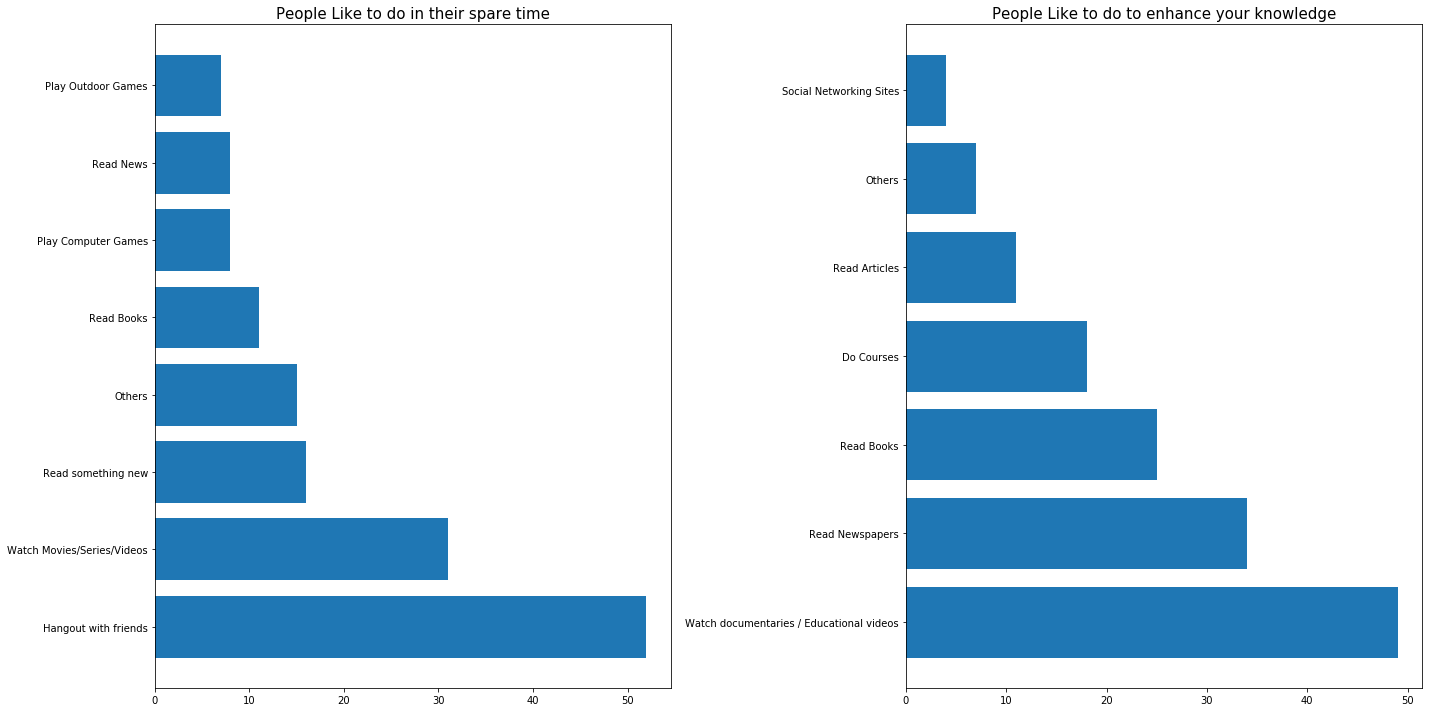

In [56]:
fig , axs = plt.subplots(1,2,figsize=(20,10))

d=publicData['What would you like to do in your free time?'].value_counts()
label4=list(d.keys())
value4=list(d.values)
axs[0].barh(label4,value4)
axs[0].set_title("People Like to do in their spare time",fontsize=15)

e=publicData['What would you do to enhance your knowledge?'].value_counts()
label5=list(e.keys())
value5=list(e.values)
axs[1].barh(label5,value5)
axs[1].set_title("People Like to do to enhance your knowledge",fontsize=15)

plt.tight_layout()

## Conclusion - 
### If, instead of hanging out with friends or watch movies/Series/Videos, people do some productive work then it will surely help in defining a better future.

# Insight 6 
## People mostly love to listen romantic songs

In [57]:
f=publicData['Which type of music do you love to listen?'].value_counts()
label6=f.keys()
value6=f.values

In [58]:
trace = go.Pie(labels=label6,values=value6,title='Popular music generes',marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



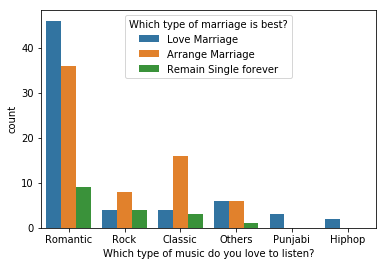

In [59]:
sns.countplot(x='Which type of music do you love to listen?',hue='Which type of marriage is best?',data=publicData)

## Conclusion - 
### Studies shows that music can actually makes you better as it does a serious impact on a person's brain activity and also helps in remembering things for a long time.

### Music defines the nature of people as the insights suggests that the person that listen romantic music is romantic in nature an prefer love marriage an the one who loves classic music is shy an mostly prefer arrange marriage.

# Insight 7
## The person who uses his mobile for 3-5 hr mostly invest his time in watching educational videos and documentries

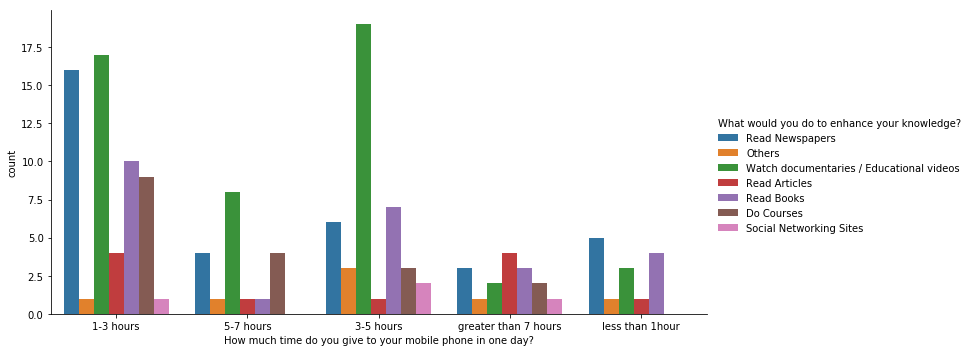

In [60]:
sns.catplot(x='How much time do you give to your mobile phone in one day?',hue='What would you do to enhance your knowledge?',data=publicData,kind='count',height=5,aspect=2)

# Insight 8 
## Watsapp is the most famous social networking plateform of 2k18
## Among teenagers Instagram is more famous
## Among the olds Facebook is more famous

In [61]:
h=publicData['Which social networking plateform do you love to use the most?'].value_counts()
label8=h.keys()
value8=h.values

In [62]:
trace = go.Pie(labels=label8,values=value8,title='Famous Social Networking Plateforms',marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



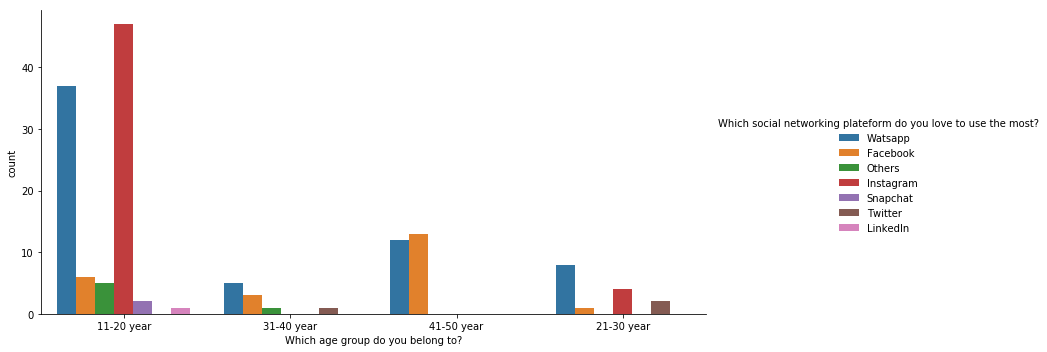

In [63]:
sns.catplot(x='Which age group do you belong to?',hue='Which social networking plateform do you love to use the most?',kind='count',data=publicData,height=5,aspect=2)

# Insight 9
## Amazon is the most famous online shopping market of 2k18

In [64]:
i=publicData['Which online shopping site do you like to prefer?'].value_counts()
label9=i.keys()
value9=i.values

In [65]:
trace=go.Pie(labels=label9,values=value9,title='Famous online shopping markets',marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



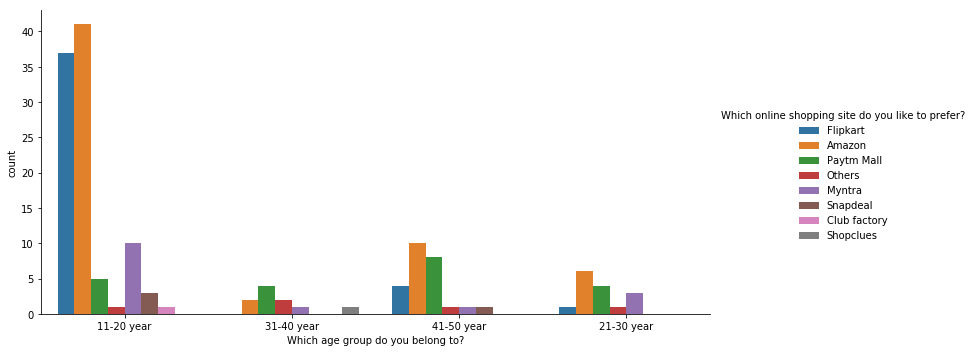

In [66]:
sns.catplot(x='Which age group do you belong to?',hue='Which online shopping site do you like to prefer?',kind='count',data=publicData,height=5,aspect=2)

# Insight 10
## Time dedicated for parents

In [67]:
j=publicData['How much time you give to your parents in a day?'].value_counts()
label10=j.keys()
value10=j.values

In [68]:
data=[go.Bar(x=label10,y=value10)]
layout=go.Layout(title='Time dedicated for parents')
trace=go.Figure(data=data,layout=layout)
py.iplot(trace)

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Conclusion - 
### In today's world majority of people have very less time for their parents.

# Insight 11
## In today's world people mostly do normal exercises like jogging, dancing, workouts etc.

In [69]:
k=publicData['What would you like to do to remain fit and healthy?'].value_counts()
label11=k.keys()
value11=k.values

trace=go.Pie(labels=label11,values=value11,title="Famous ways to remain fit n healthy in today's world",marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Insight 12
## People mostly use different kinds of shampoo brands for different hair types

In [70]:
l=publicData['Which shampoo brand would you like to use?'].value_counts()
label12=l.keys()
value12=l.values

trace=go.Pie(labels=label12,values=value12,title="Famous Shampoo Brand",marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Insight 13
## In 2k18 Colgate is the most famous toothpaste brand as it is most promising among other brands
## It is also observed that Dant Kanti by patanjali is more famous among old age groups

In [71]:
m=publicData['Which toothpaste brand would you like to use?'].value_counts()
label13=m.keys()
value13=m.values

trace=go.Pie(labels=label13,values=value13,title="Famous Toothpaste Brand",marker=dict(line=dict(color='#000000', width=2)))
py.iplot([trace])

C:\Users\Shantanu\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



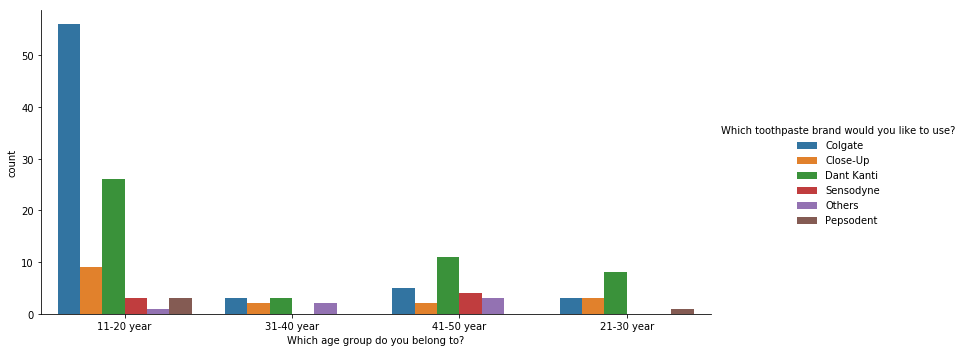

In [72]:
sns.catplot(x='Which age group do you belong to?',hue='Which toothpaste brand would you like to use?',kind='count',data=publicData,height=5,aspect=2)

In [73]:
publicData.to_csv('publicData.csv')

# Insights using Tableau

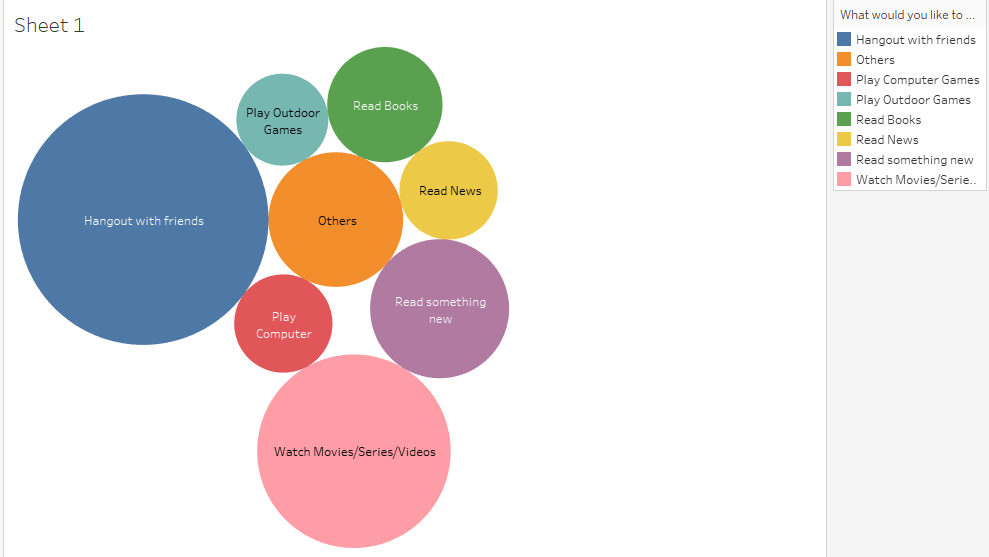

In [74]:
Image(filename='img1.png')

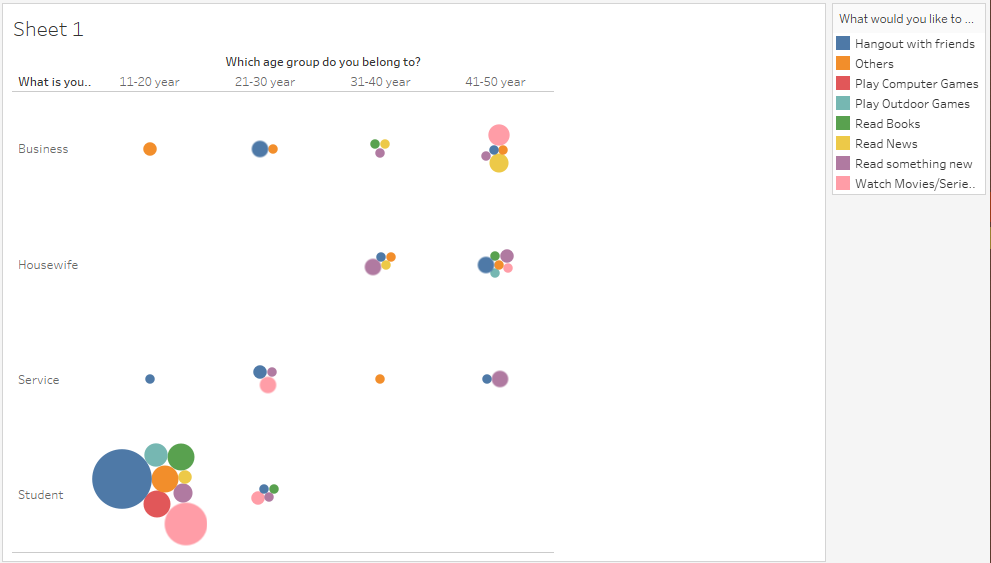

In [75]:
Image(filename='img2.png')

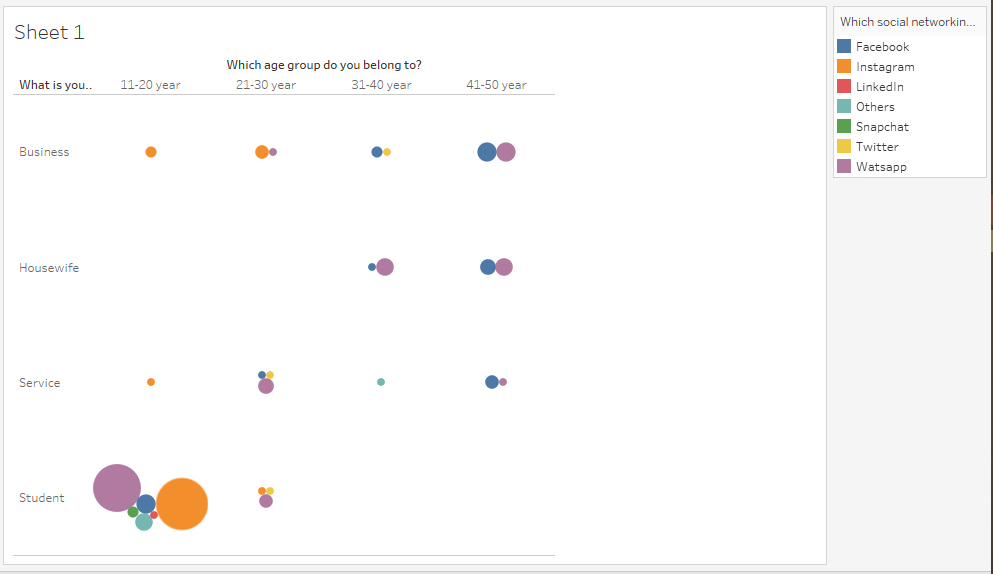

In [76]:
Image(filename='img3.png')

# Interactive app using Bokeh plotting library

In [77]:
p1 = figure(x_range=label1.tolist(), plot_height=400,toolbar_location=None)
p1.vbar(x=label1.tolist(), top=value1.tolist(), width=0.9)

p2 = figure(x_range=label6.tolist(), plot_height=400,toolbar_location=None)
p2.vbar(x=label6.tolist(), top=value6.tolist(), width=0.9)

p3 = figure(x_range=label8.tolist(), plot_height=400,toolbar_location=None)
p3.vbar(x=label8.tolist(), top=value8.tolist(), width=0.9)

p4 = figure(x_range=label9.tolist(), plot_height=400,toolbar_location=None)
p4.vbar(x=label9.tolist(), top=value9.tolist(), width=0.9)

GlyphRenderer(id='1151', ...)

In [78]:
t1=Panel(child=p1,title='Favourite political leader')
t2=Panel(child=p2,title='Popular music generes')
t3=Panel(child=p3,title='Famous Social Networking Plateforms')
t4=Panel(child=p4,title='Famous online shopping markets')

In [79]:
layout = Tabs(tabs=[t1,t2,t3,t4])
curdoc().add_root(layout)
output_file('visualizations.html')
show(layout)